Exercise Sheet 1  **Principal Component Analysis**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
import matplotlib.image as img
from mpl_toolkits.mplot3d import Axes3D
import os


In [2]:
def do_center(array):
    return array-(np.sum(array, axis=0)/len(array))


In [3]:
def calc_cov_mat(array, is_centered=False):
    if not is_centered:
        array = do_center(array)
    return np.matmul(array.T, array)


In [4]:
def remap(array, xax):
    n_ax = len(xax)
    if n_ax == 2:
        xphi = np.arctan(xax[1]/xax[0])
        transfer_mat = np.array([[np.cos(xphi),-np.sin(xphi)],
                                 [np.sin(xphi), np.cos(xphi)]])
        return np.matmul(array, transfer_mat)
    if n_ax == 3:
        t = np.arctan(xax[1]/xax[0])
        b = np.arctan(xax[2]/xax[1])
        a = np.arctan(xax[0]/xax[2])
        xy_transfer_mat = np.array([[ np.cos(t) ,-np.sin(t),         0],
                                    [ np.sin(t) , np.cos(t),         0],
                                    [ 0         , 0        ,         1]])

        zx_transfer_mat = np.array([[ np.cos(b) , 0        ,-np.sin(b)],
                                    [ 0         , 1        ,         0],
                                    [ np.sin(b) , 0        , np.cos(b)]])

        yz_transfer_mat = np.array([[1          , 0        ,        0],
                                    [0          , np.cos(a),-np.sin(a)],
                                    [0          , np.sin(a), np.cos(a)]])
        transfer_mat = xy_transfer_mat@zx_transfer_mat@yz_transfer_mat
        return np.matmul(array, transfer_mat)

In [5]:
def calc_eigs(data_array):
    # calculating covariance matrix
    cov_mat = calc_cov_mat(data_array)

    # calculating eigenvectors and eigenvalues
    try:
        eigvals, eigvecs = np.linalg.eig(cov_mat)
    except np.linalg.LinAlgError:
        print('eigenvalue computation did not converge!')

    # sorting based on largest eigen-values
    normed_eigvals = eigvals/np.sqrt(np.sum(eigvals**2))
    sorted_eigvals = np.flip(np.sort(normed_eigvals))
    sorted_eigvecs = np.array(eigvecs[:, np.flip(np.argsort(eigvals))])
    return sorted_eigvals, sorted_eigvecs


**1.1: PCA: 2-dimensional Toy Data**

(a)

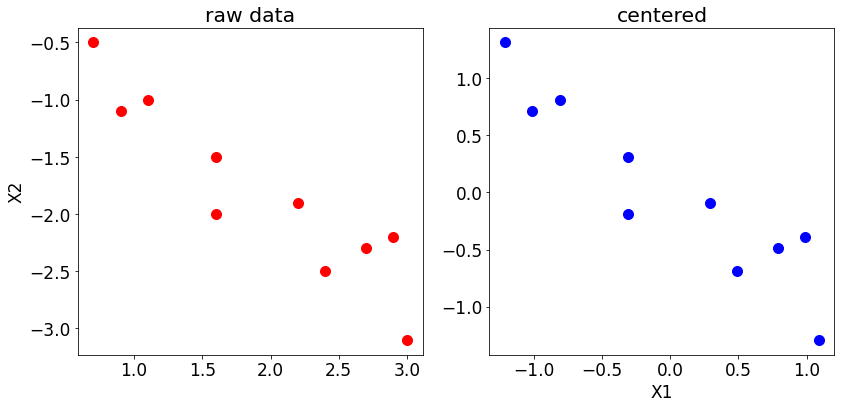

In [6]:
# reading the data into array
pca_data_2d = np.genfromtxt('pca-data-2d.dat.txt', float)

# centering the data
pca_data_2d_centered = do_center(pca_data_2d)

# limits for scaled plotting
xlim = (min(np.floor(pca_data_2d_centered[:, 0])),
        max(np.ceil(pca_data_2d_centered[:, 0])))
ylim = (min(np.floor(pca_data_2d_centered[:, 1])),
        max(np.ceil(pca_data_2d_centered[:, 1])))

# plotting
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(pca_data_2d[:, 0],
            pca_data_2d[:, 1], c='r', s=100)
plt.title('raw data')
plt.ylabel('X2')
plt.subplot(1, 2, 2)
plt.scatter(pca_data_2d_centered[:, 0],
            pca_data_2d_centered[:, 1], c='b', s=100)
plt.title('centered')
plt.xlabel('X1')
plt.tight_layout()
plt.show()


(b)

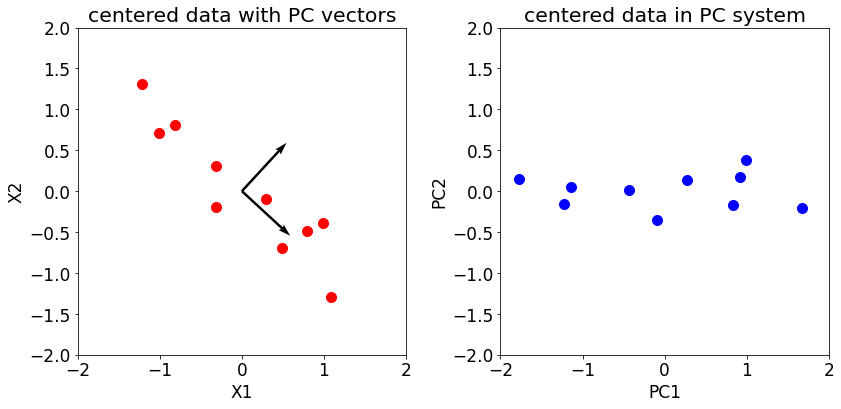

In [7]:
# we know eigen-vectors are the principle components
eigvalues_2d, eigvectors_2d = calc_eigs(pca_data_2d_centered)

# remapping the data into pc-system
pca_data_2d_trans = remap(pca_data_2d_centered, eigvectors_2d[:, 0])

# plotting
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(pca_data_2d_centered[:, 0],
            pca_data_2d_centered[:, 1], c='r', s=100)
plt.quiver(0, 0, eigvectors_2d[0, 0],
           eigvectors_2d[1, 0], scale=5)
plt.quiver(0, 0, eigvectors_2d[0, 1],
           eigvectors_2d[1, 1], scale=5)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('centered data with PC vectors')
plt.subplot(1, 2, 2)
plt.scatter(pca_data_2d_trans[:, 0],
            pca_data_2d_trans[:, 1], c='b', s=100)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('centered data in PC system')
plt.tight_layout()
plt.show()


(c)

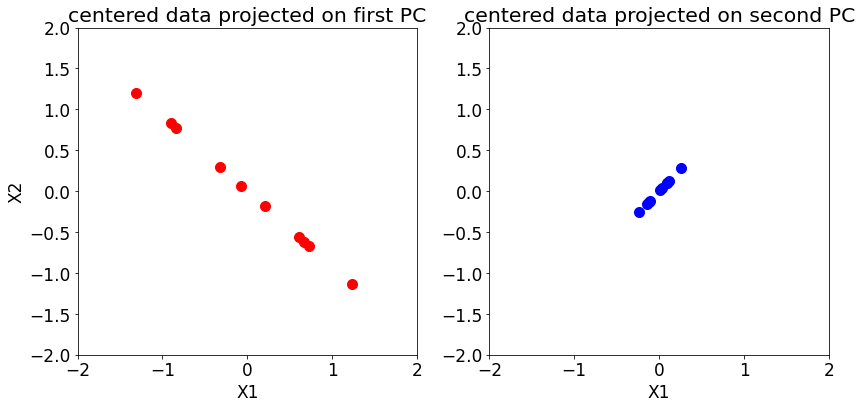

In [8]:
# compression
pca_data_2d_proj_pc1 = np.dot(pca_data_2d_centered,
                              eigvectors_2d[:, 0])
pca_data_2d_proj_pc2 = np.dot(pca_data_2d_centered,
                              eigvectors_2d[:, 1])

# plotting
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(pca_data_2d_proj_pc1*eigvectors_2d[0, 0],
            pca_data_2d_proj_pc1*eigvectors_2d[1, 0], c='r', s=100)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('centered data projected on first PC')
plt.subplot(1, 2, 2)
plt.scatter(pca_data_2d_proj_pc2*eigvectors_2d[0, 1],
            pca_data_2d_proj_pc2*eigvectors_2d[1, 1], c='b', s=100)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('X1')
plt.title('centered data projected on second PC')
plt.tight_layout()
plt.show()


**1.2: PCA: 3-dimensional Toy Data**

(a)

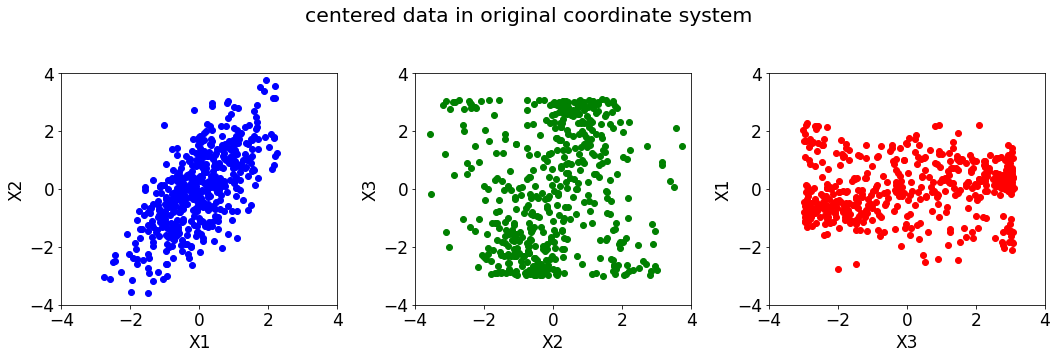

In [9]:
# reading the data into array
pca_data_3d = np.genfromtxt('pca-data-3d.txt', float,
                            delimiter=',', skip_header=1)

# centering the data
pca_data_3d_centered = do_center(pca_data_3d)

# plotting
colors = ['b', 'g', 'r', 'c']
vs_index = ['2', '3', '1']
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(pca_data_3d_centered[:, i],
                pca_data_3d_centered[:, i-2], c=colors[i])
    plt.xlabel('X%s' %str(i+1))
    plt.ylabel('X%s' %vs_index[i])
    plt.xlim((-4, 4))
    plt.ylim((-4, 4))
plt.suptitle('centered data in original coordinate system', y = 1.01)
plt.tight_layout()
plt.show()


(b)

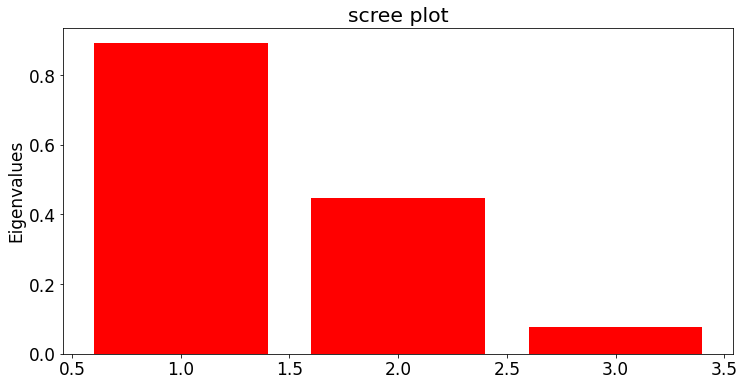

In [10]:
# we know eigen-vectors are the principle components
eigvalues_3d, eigvectors_3d = calc_eigs(pca_data_3d_centered)

# scree plot
plt.figure(figsize=(12,6))
plt.bar(range(1,1+len(eigvalues_3d)), eigvalues_3d, color='r')
plt.title('scree plot')
plt.ylabel('Eigenvalues')
plt.show()

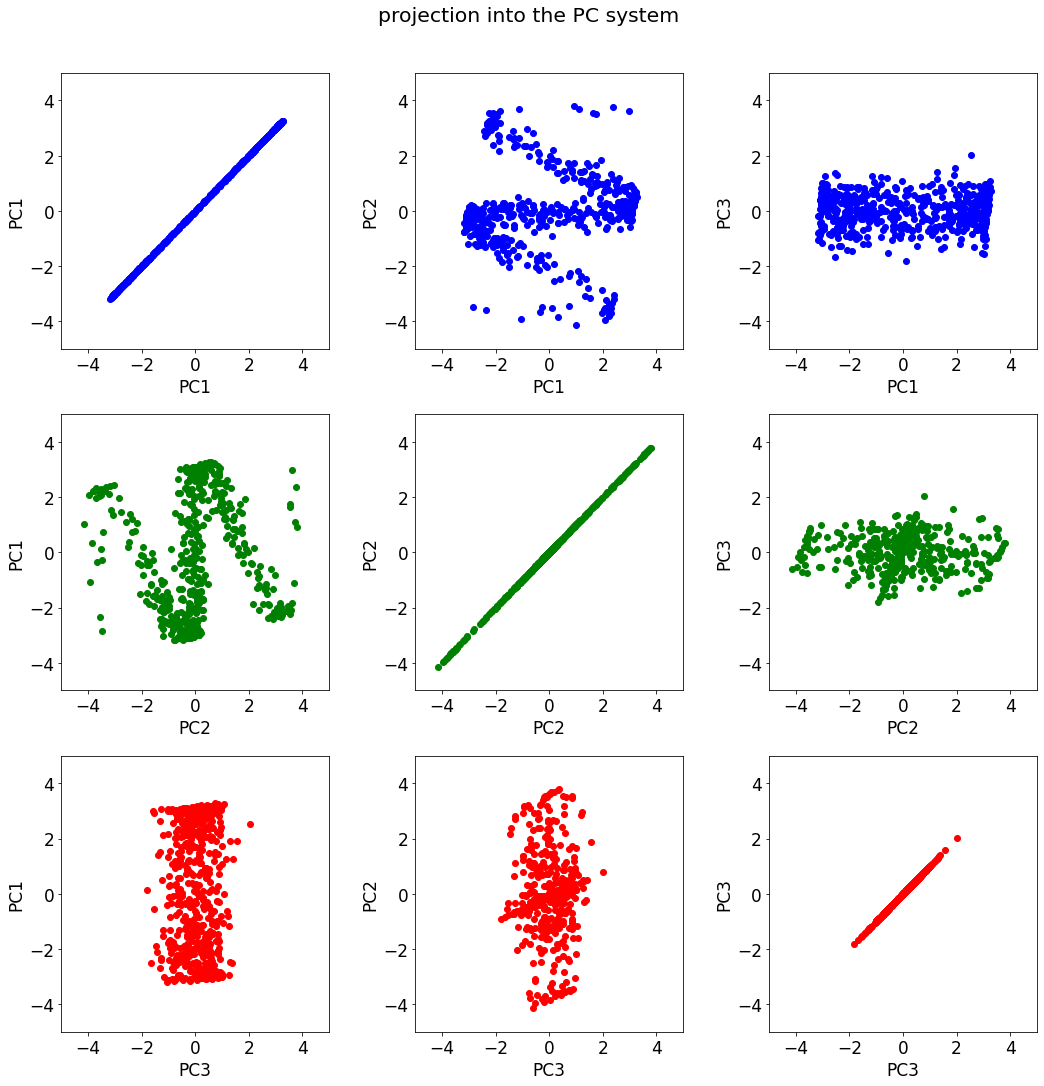

In [11]:
projections = []
for k in range(3):
    projections.append(np.dot(pca_data_3d_centered, eigvectors_3d[:,k]))
projections = np.array(projections).T

plt.figure(figsize=(15,15))
plt.suptitle('projection into the PC system', y = 1.01)
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*(i)+(j+1))
        plt.scatter(projections[:, i], projections[:, j], c=colors[i])
        plt.xlabel('PC%s' %str(i+1))
        plt.ylabel('PC%s' %str(j+1))
        plt.xlim((-5, 5))
        plt.ylim((-5, 5))
plt.tight_layout()
plt.show()

(c)

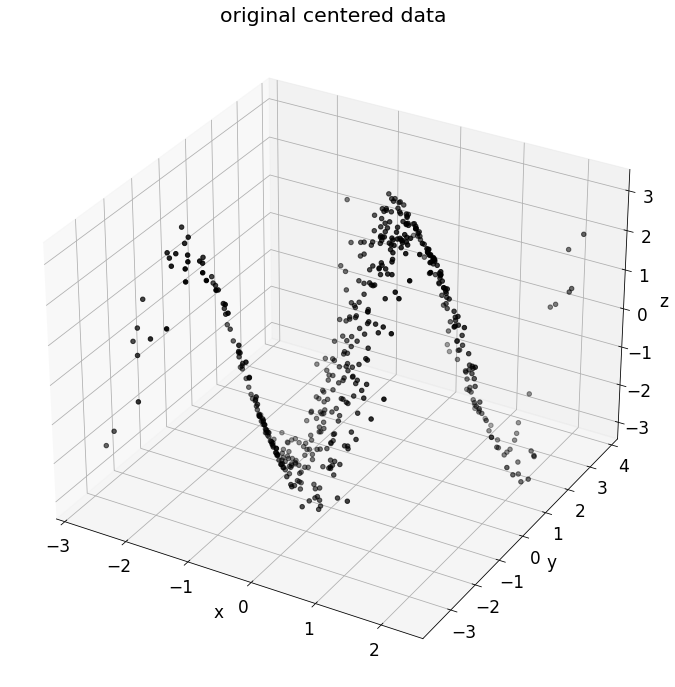

In [12]:
# plotting the original centered data
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_3d_centered[:,0],
           pca_data_3d_centered[:,1],
           pca_data_3d_centered[:,2], c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('original centered data')
plt.show()


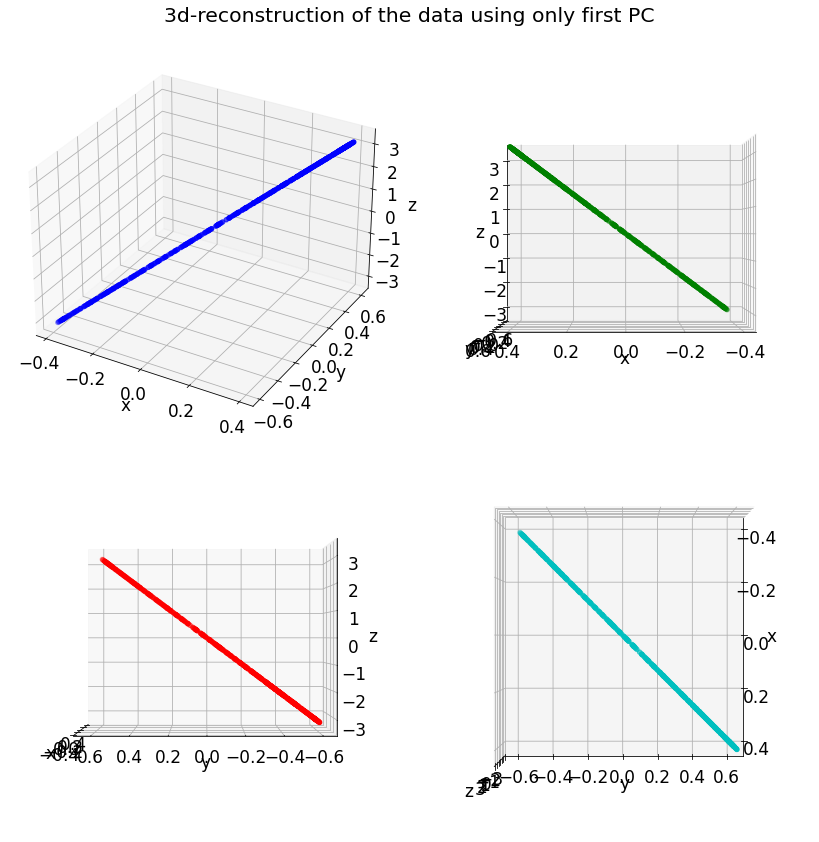

In [13]:

# reconstruction using first pc
x_1 = projections[:,0]*eigvectors_3d[0,0]
y_1 = projections[:,0]*eigvectors_3d[1,0]
z_1 = projections[:,0]*eigvectors_3d[2,0]

fig = plt.figure(figsize=(12,12))
subplot = [221,222,223,224]
for v in range(4):
    ax = fig.add_subplot(subplot[v], projection='3d')
    ax.scatter(x_1, y_1, z_1, c=colors[v])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    if v == 3:
        ax.view_init(elev=90, azim=0)
    elif v != 0:
        ax.view_init(elev=0, azim=v*90)
plt.suptitle('3d-reconstruction of the data using only first PC')
plt.tight_layout()
plt.show()


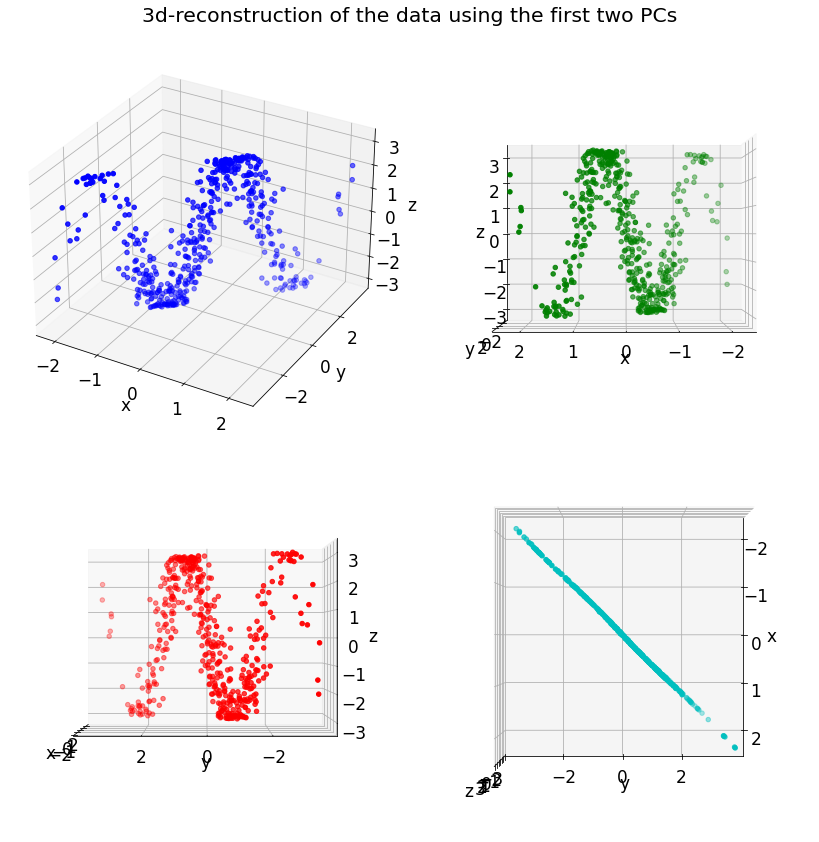

In [14]:
# reconstruction using first two pcs
x_2 = projections[:,1]*eigvectors_3d[0,1]
y_2 = projections[:,1]*eigvectors_3d[1,1]
z_2 = projections[:,1]*eigvectors_3d[2,1]

fig = plt.figure(figsize=(12,12))
subplot = [221,222,223,224]
for v in range(4):
    ax = fig.add_subplot(subplot[v], projection='3d')
    ax.scatter(x_1+x_2, y_1+y_2, z_1+z_2, c=colors[v])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    if v == 3:
        ax.view_init(elev=90, azim=0)
    elif v != 0:
        ax.view_init(elev=0, azim=v*90)
plt.suptitle('3d-reconstruction of the data using the first two PCs')
plt.tight_layout()
plt.show()


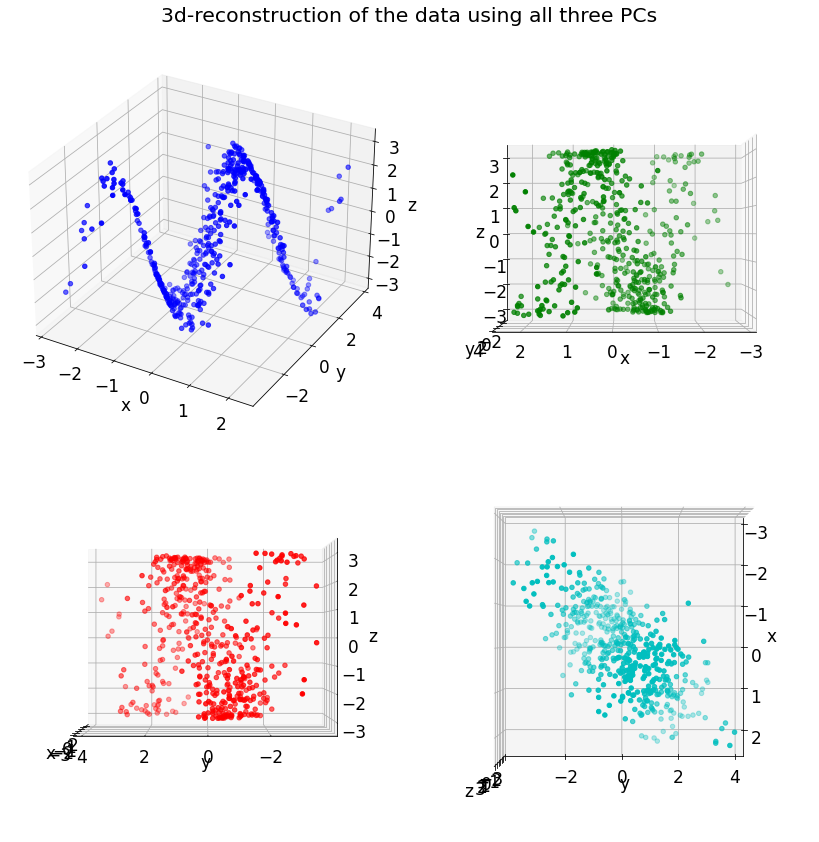

In [15]:
# reconstruction using all PCs
x_3 = projections[:,2]*eigvectors_3d[0,2]
y_3 = projections[:,2]*eigvectors_3d[1,2]
z_3 = projections[:,2]*eigvectors_3d[2,2]


fig = plt.figure(figsize=(12,12))
subplot = [221,222,223,224]
for v in range(4):
    ax = fig.add_subplot(subplot[v], projection='3d')
    ax.scatter(x_1+x_2+x_3, y_1+y_2+y_3, z_1+z_2+z_3, c=colors[v])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    if v == 3:
        ax.view_init(elev=90, azim=0)
    elif v != 0:
        ax.view_init(elev=0, azim=v*90)
plt.suptitle('3d-reconstruction of the data using all three PCs')
plt.tight_layout()
plt.show()



**1.3: Projections of a dynamical system**

(a)

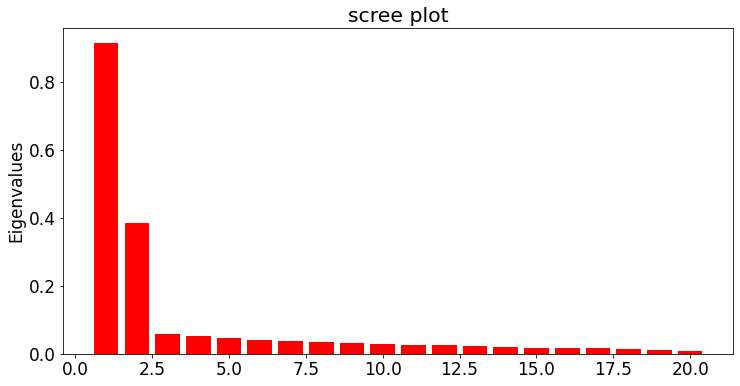

In [16]:
# reading the data into array
expDat = np.genfromtxt('expDat.txt', int, delimiter=',',
                       skip_header=1)[:,1:]

# centering the data
expDat_centered = do_center(expDat)

# we know eigen-vectors are the principle components
eigvalues_20d, eigvectors_20d = calc_eigs(expDat)

# scree plot
plt.figure(figsize=(12,6))
plt.bar(range(1,1+len(eigvalues_20d)), eigvalues_20d, color='r')
plt.title('scree plot')
plt.ylabel('Eigenvalues')
plt.show()


(b)

In [17]:
# remapping the data into pc-system
pc1_as_x = np.dot(expDat_centered, eigvectors_20d[:, 0])
pc2_as_y = np.dot(expDat_centered, eigvectors_20d[:, 1])


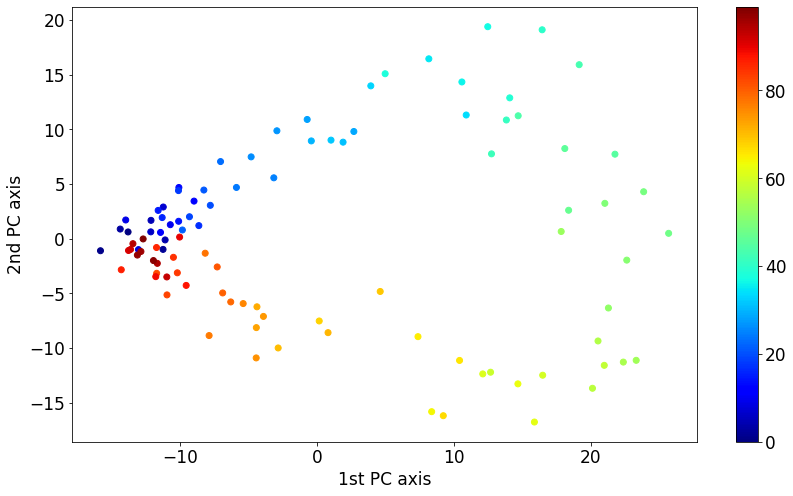

In [18]:
# plotting (i)
color_set = np.arange(len(pc1_as_x))
plt.figure(figsize=(14,8))
plt.scatter(pc1_as_x, pc2_as_y, c=color_set, cmap='jet')
plt.colorbar()
plt.xlabel('1st PC axis')
plt.ylabel('2nd PC axis')
plt.show()


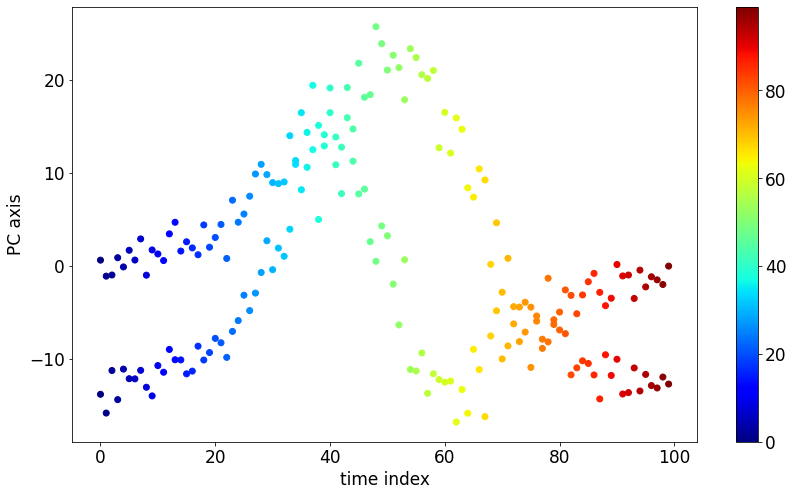

In [19]:
# plotting (ii)
color_set = np.arange(len(pc1_as_x))
plt.figure(figsize=(14,8))
plt.scatter(color_set, pc1_as_x, c=color_set, cmap='jet')
plt.scatter(color_set, pc2_as_y, c=color_set, cmap='jet')
plt.colorbar()
plt.ylabel('PC axis')
plt.xlabel('time index')
plt.show()


(c)

In [20]:
# copying and shuffling
expDat_centered_shuffled = np.copy(expDat_centered)
for i in range(np.shape(expDat_centered_shuffled)[1]):
    np.random.shuffle(expDat_centered_shuffled[:, i])


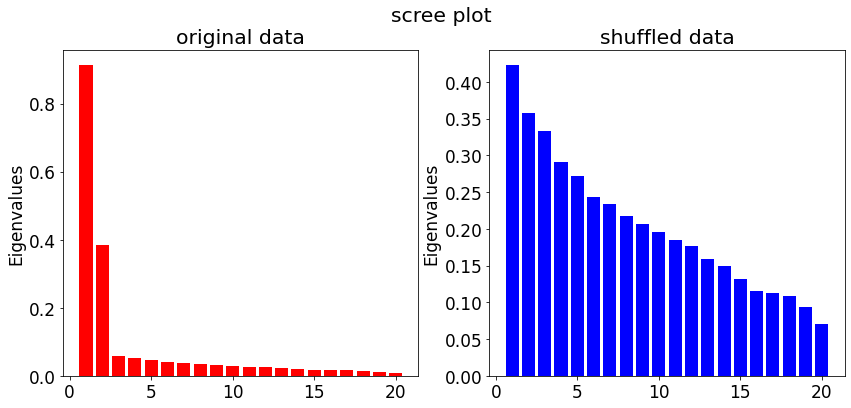

In [21]:
# we know eigen-vectors are the principle components
eigvalues_shuf, eigvectors_shuf = calc_eigs(expDat_centered_shuffled)

# scree plot
n_dim = 20
plt.figure(figsize=(14,6))
plt.suptitle('scree plot')
plt.subplot(1,2,1)
plt.bar(range(1,1+n_dim), eigvalues_20d, color='r')
plt.title('original data')
plt.ylabel('Eigenvalues')
plt.subplot(1,2,2)
plt.bar(range(1,1+n_dim), eigvalues_shuf, color='b')
plt.title('shuffled data')
plt.ylabel('Eigenvalues')
plt.show()


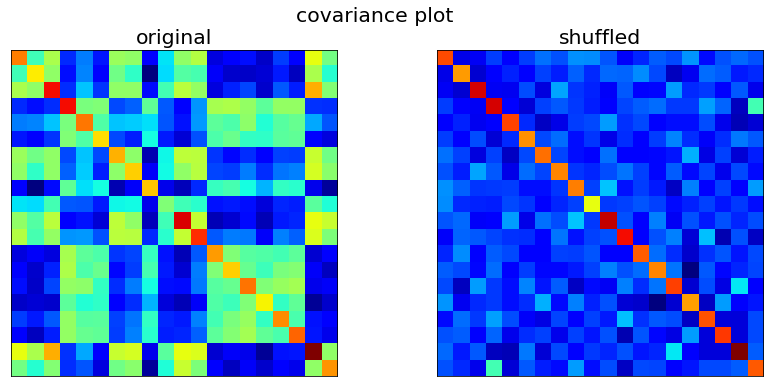

In [22]:
# covariance mat
cov_mat = calc_cov_mat(expDat_centered)
cov_mat_shuf = calc_cov_mat(expDat_centered_shuffled)

# covariance heat map
plt.figure(figsize=(14,6))
plt.suptitle('covariance plot')
plt.subplot(1,2,1)
plt.imshow(cov_mat, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(cov_mat_shuf, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.title('shuffled')
plt.show()


Exercise 1.4: Image data compression and reconstruction

In [30]:
def get_from_path(starting_char, sPath = 'imgpca/'):
    setFile = []
    for file in os.listdir(sPath):
        if file[0] == starting_char:
            if os.path.isfile(os.path.join(sPath, file)):
                setFile.append(os.path.join(sPath, file))
    return setFile

def patch_stack(im_data, file_list, n, patch_size):
    for file in file_list:
        image = img.imread(file)
        ijs = []
        counter = 0
        max_try = 100
        n_try = 0
        width = image.shape[0]
        length = image.shape[1]
        patch_width = patch_size[0]
        patch_length = patch_size[1]
        while counter < n and n_try < max_try:
            i = np.random.randint(0, width-patch_width)
            j = np.random.randint(0, length-patch_length)
            if (i,j) not in ijs:
                ijs.append((i,j))
                patch = image[i:i+16, j:j+16]
                patch = patch.flatten()
                im_data = np.vstack((im_data, patch))
                counter += 1
            else:
                n_try += 1
    return im_data


def unq_patch_stack(im_data, file_list, n, patch_size):
    if type(file_list) != list:
        file_list = [file_list]
    for file in file_list:
        image = img.imread(file)
        image_copy = np.copy(image)
        ijs = []
        counter = 0
        max_try = 100
        n_try = 0
        width = image_copy.shape[0]
        length = image_copy.shape[1]
        patch_width = patch_size[0]
        patch_length = patch_size[1]
        while counter < n and n_try < max_try:
            i = np.random.randint(0, width-patch_width)
            j = np.random.randint(0, length-patch_length)
            if (i,j) not in ijs:
                if None not in image_copy[i:i+16, j:j+16]:
                    patch = np.copy(image_copy[i:i+16, j:j+16])
                    patch = patch.flatten()
                    im_data = np.vstack((im_data, patch))
                    counter += 1
                    image_copy[i:i+16, j:j+16] = np.nan
            else:
                n_try += 1
    return im_data


def min_max_scale(minrange, maxrange, nparray):
    minv = np.min(nparray)
    nparray = nparray + (minrange - minv)
    maxv = np.max(nparray)
    nparray = maxrange * nparray / maxv
    return nparray


In [31]:
# selecting the files for each category
list_nature = get_from_path('n', 'imgpca/')
list_building = get_from_path('b', 'imgpca/')


(a)

In [32]:
# creating and stacking the patches
im_data = np.zeros((1,256))
im_data_nature = patch_stack(im_data, list_nature, 500, (16, 16))
im_data_nature = im_data_nature[1:,:]

im_data = np.zeros((1,256))
im_data_building = patch_stack(im_data, list_building, 500, (16, 16))
im_data_building = im_data_building[1:,:]


(b)

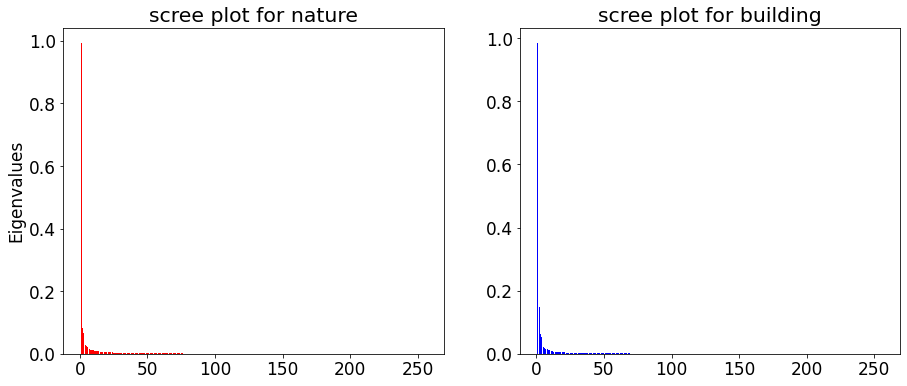

In [33]:
# centering the data
eigvalus_nature, eigvectors_nature = calc_eigs(im_data_nature)
eigvalus_building, eigvectors_building = calc_eigs(im_data_building)

n_dim = 256

# scree plot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.bar(range(1,1+n_dim), eigvalus_nature, color='r')
plt.title('scree plot for nature')
plt.ylabel('Eigenvalues')
plt.subplot(1,2,2)
plt.bar(range(1,1+n_dim), eigvalus_building, color='b')
plt.title('scree plot for building')
plt.show()


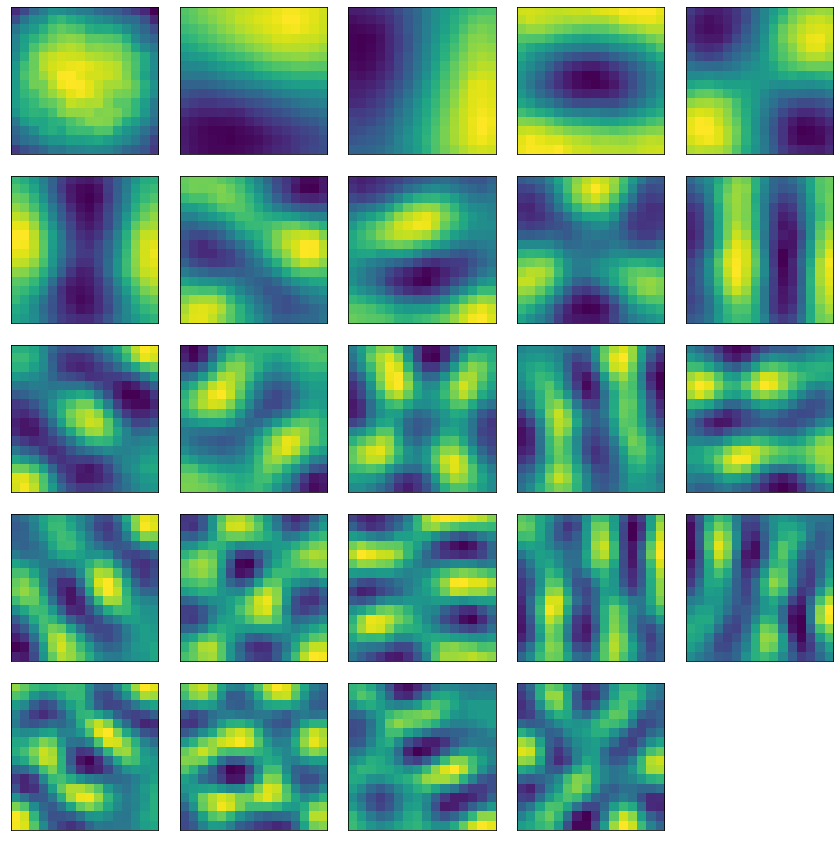

In [34]:
# nature PCs as images
plt.figure(figsize = (12,12))
for i in range(24):
    plt.subplot(5, 5, i+1)
    pc_img = np.reshape(min_max_scale(0, 255, eigvectors_nature[:, i]), (16,16))
    plt.imshow(pc_img)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


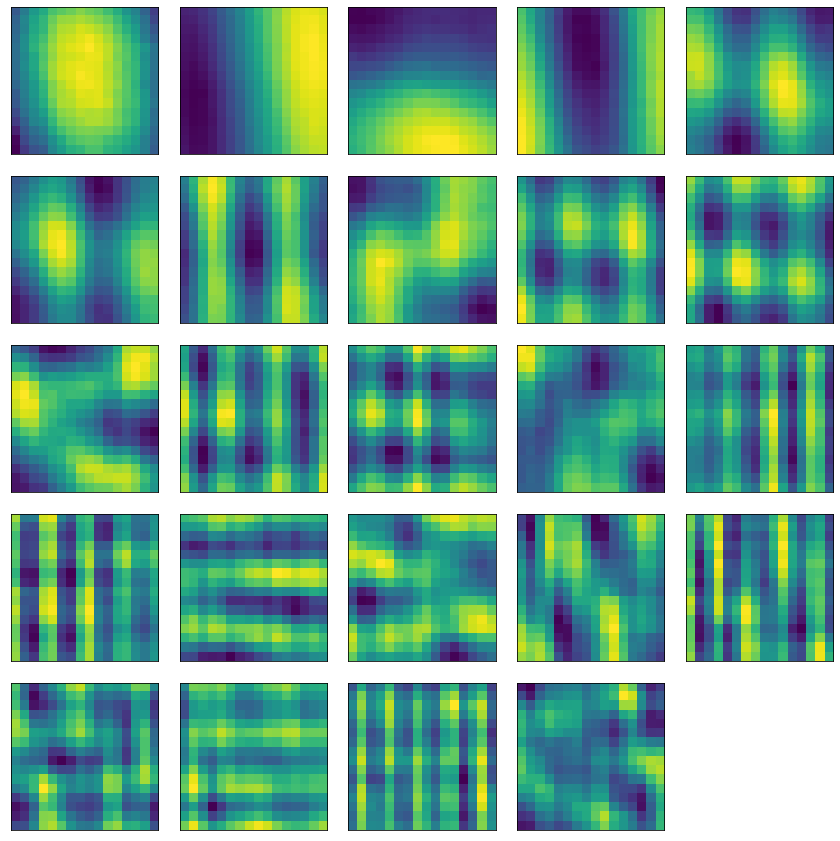

In [35]:
# building PCs as images
plt.figure(figsize = (12,12))
for i in range(24):
    plt.subplot(5, 5, i+1)
    pc_img = np.reshape(min_max_scale(0, 255, eigvectors_building[:, i]), (16,16))
    plt.imshow(pc_img)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


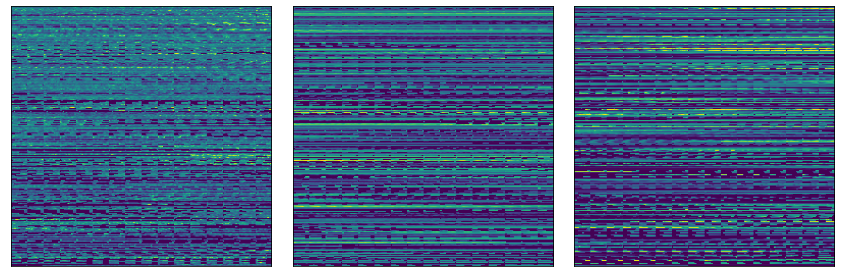

In [36]:
# creating and stacking the non-overlapping patches
plt.figure(figsize = (12,12))
for i in range(3):
    plt.subplot(1, 3, i+1)
    im_data = np.zeros((1,256))
    im_data_nature_unq = unq_patch_stack(im_data, list_nature[i], 256, (16, 16))
    im_data_nature_unq = im_data_nature_unq[1:,:]
    plt.imshow(im_data_nature_unq)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()